<a href="https://colab.research.google.com/github/Akshaya-143/Assignment-2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Visualization

<Axes: ylabel='age'>

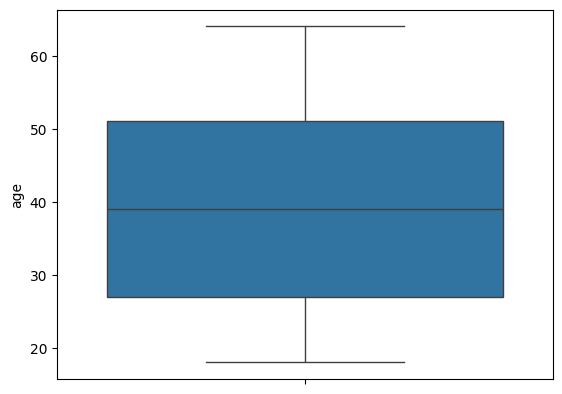

In [ ]:
sns.boxplot(data['age'])

Age donot have any outliers

Preprocessing of data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Separating the Data

In [ ]:
x=data.drop(columns=['charges'],axis=1)
y=data["charges"]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Scaling of Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
X

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


Splitting of Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
x_test

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1
726,41,1,28.405,1,0,1
1132,57,1,40.280,0,0,0
725,30,0,39.050,3,1,2


In [29]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Model Building

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred= lr.predict(x_test)
y_pred

array([ 1.10172305e+04,  9.78753017e+03,  3.79947821e+04,  1.61227784e+04,
        6.93075923e+03,  3.96902046e+03,  1.55178430e+03,  1.42832091e+04,
        8.95342886e+03,  7.43194558e+03,  4.54457668e+03,  1.02472753e+04,
        8.65710757e+03,  4.12619770e+03,  2.78113171e+04,  1.10395971e+04,
        1.12514458e+04,  6.03101003e+03,  8.17339252e+03,  2.70394424e+04,
        3.35778484e+04,  1.42670864e+04,  1.16850232e+04,  3.24069403e+04,
        4.41465153e+03,  9.14607182e+03,  1.12786921e+03,  1.00891473e+04,
        4.08782973e+03,  1.03569127e+04,  8.96224058e+03,  4.02452861e+04,
        1.54779185e+04,  1.36671353e+04,  2.47415217e+04,  5.13005676e+03,
        1.28428861e+04,  3.05264017e+04,  3.34289155e+04,  3.48813457e+03,
        4.00215674e+03,  4.27800724e+03,  3.04613664e+04,  3.93491672e+04,
        2.80033682e+04,  5.00299253e+03,  1.09312243e+04,  7.77848493e+03,
        3.60829639e+03,  1.05573586e+04,  5.62958594e+03,  3.37882569e+03,
        3.28476568e+04,  

Evaluating Model Performance

In [32]:
from sklearn.metrics import r2_score
r = r2_score(y_pred,y_test)
r

0.7245405921827408